In [11]:
import pandas as pd
import sys
import numpy as np
import scipy as sc
import mglearn.plots
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import dummy
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score


In [12]:
#LOADING DATA
db = pd.read_csv('glass.csv')

In [13]:
#Step 2. Explore the dataset structure
db.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [14]:
shape = db.shape
array = db.values

# Divide the dataset into X and Y
X = array[:, 0:shape[1] - 1]
y = array[:, shape[1] - 1]

In [15]:
kf = KFold(n_splits=5,random_state=8, shuffle=True)
kf.get_n_splits(X)

# we divide the datasets in 10 folds, we use 4 as seed for the random generator and we shuffle the elements
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [  2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  24  28  29  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  66  67  68  69  70  71  72  73  74  75  76  79  81  82  83
  84  85  86  87  89  90  91  92  93  95  96  98  99 102 104 105 107 108
 109 110 111 112 113 115 116 118 119 120 121 122 123 125 126 128 129 130
 131 133 134 135 136 137 138 139 140 142 143 145 146 147 148 149 151 152
 153 154 155 156 158 159 160 163 165 167 169 170 171 173 175 176 177 178
 179 180 181 184 185 186 187 188 189 191 192 193 194 195 196 199 201 202
 203 204 205 206 207 208 209 211 213] TEST: [  0   1   5  23  25  26  27  30  65  77  78  80  88  94  97 100 101 103
 106 114 117 124 127 132 141 144 150 157 161 162 164 166 168 172 174 182
 183 190 197 198 200 210 212]
TRAIN: [  0   1   2   5   6   7   8   9  11  13  14  15  16  18  19  20  21  22
  23  25  26  27  28  29  30  31  32

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [17]:
clf = MultinomialNB()

In [18]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [19]:
import collections
results = collections.defaultdict(dict)

In [20]:
clf1 =  MultinomialNB()
clf2 = KNeighborsClassifier()
clf3 = DummyClassifier(strategy='uniform')
clfs =[clf1,clf2,clf3]
names = ['nb','knn','rg']
results = dict()
kf = KFold(n_splits=5,random_state=8, shuffle=True)
kf.get_n_splits(X)

5

In [21]:
for i, clf in enumerate(clfs):
    results[names[i]] = []
    for train_index, test_index in kf.split(X):
        print(i)
        X_train, X_test = X[train_index], X[test_index];
        y_train, y_test = y[train_index], y[test_index];

        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        results[names[i]].append(f1_score(y_pred, y_test, average='weighted') )


0
0
0
0
0
1
1
1
1
1
2
2
2
2
2


/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/Paolo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
y_pred

array([ 2.,  1.,  5.,  1.,  5.,  6.,  5.,  5.,  5.,  1.,  6.,  7.,  5.,
        6.,  2.,  1.,  2.,  1.,  7.,  7.,  2.,  1.,  2.,  1.,  1.,  2.,
        3.,  6.,  7.,  3.,  7.,  6.,  7.,  5.,  7.,  2.,  3.,  5.,  2.,
        6.,  7.,  6.])

In [23]:
y_test

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  3.,  3.,  5.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.])

In [24]:
results


{'knn': [0.51417497231450726,
  0.64961240310077517,
  0.81484794275491956,
  0.76328903654485047,
  0.71233766233766227],
 'nb': [0.55113605987703818,
  0.43531662136313293,
  0.66167846309403444,
  0.55132385191876798,
  0.49235842985842981],
 'rg': [0.19413226512369716,
  0.062593288073571188,
  0.1251529057393567,
  0.18788249694002448,
  0.18737870316817684]}

In [25]:
from sklearn.metrics import precision_recall_fscore_support as score



precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [ 0.375       0.625       0.33333333  0.          0.          0.125     ]
recall: [ 0.27272727  0.27777778  0.5         0.          0.          0.14285714]
fscore: [ 0.31578947  0.38461538  0.4         0.          0.          0.13333333]
support: [11 18  2  1  3  7]


In [26]:
#Exercise 3 #
# 1st part



(65, 9)


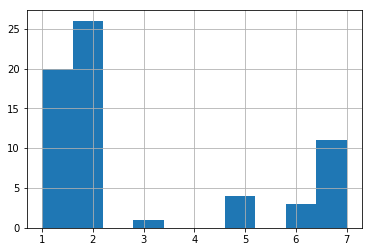

In [27]:
# random split seed 4 and test size 0.30
shape = db.shape
array = db.values

# Divide the dataset into X and Y
X = array[:, 0:shape[1] - 1]
y = array[:, shape[1] - 1]

# Randomly split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.30, random_state=4)

print (X_test.shape)

# Plot the histogram of the y test set
y_test = pd.Series(y_test) #convert the array into a pandas Series
y_test.hist()

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)


In [31]:
clf = KNeighborsClassifier(n_neighbors=3)

In [32]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
print("Test set accuracy: %.2f" % clf.score(X_test, y_test))

Test set accuracy: 0.72


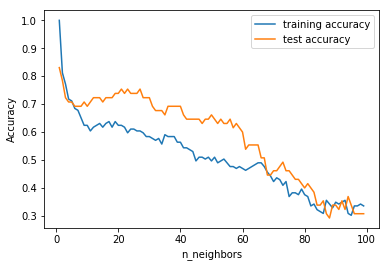

In [34]:

         
# Build a list of the training and test scores for increasing k
training_accuracy = []
test_accuracy = []
k = range(1, 100)
for n_neighbors in k:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train) # record training and test set accuracy 
    training_accuracy.append(clf.score(X_train, y_train)) 
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(k, training_accuracy, label="training accuracy")
plt.plot(k, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
_ = plt.legend()

In [35]:
#2 part



In [36]:
shape = db.shape
array = db.values

# Divide the dataset into X and Y
X = array[:, 0:shape[1] - 1]
y = array[:, shape[1] - 1]

# Randomly split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.30, random_state=4)

In [48]:
# Create the pipeline
clf = make_pipeline(MinMaxScaler(), SVC(kernel ='linear'))

In [49]:
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100] }

# Define the parameters of the GridSearch and fit it.
grid = GridSearchCV(clf, param_grid, cv = 5, scoring='accuracy')

In [39]:
print("Size of trainig set: %d  size of test set: %d" % (X_train.shape[0], X_test.shape[0]))

Size of trainig set: 149  size of test set: 65


In [40]:
best_score = 0
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    svm = SVC(C=C)
    svm.fit(X_train, y_train)
    score = svm.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'C' : C}
print("best score: ", best_score)
print("best parameters: ", best_parameters)

best score:  0.830769230769
best parameters:  {'C': 10}


threefold_split


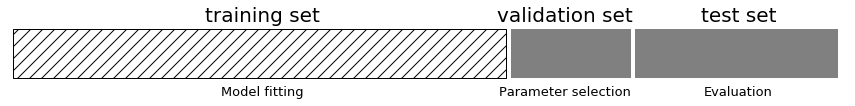

In [41]:
print("threefold_split")
mglearn.plots.plot_threefold_split()

In [42]:
#using GridSearchCV
param_grid= {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [43]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [44]:
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

0.76923076923076927

In [45]:
print(grid_search.best_params_)

{'C': 100}


In [46]:
print(grid_search.best_score_)

0.664429530201
